<a href="https://colab.research.google.com/github/willfinnigan/kinetics/blob/master/Advanced_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the required modules
%%capture
!pip install kinetics

In [0]:
# Import the required modules
import kinetics
import matplotlib.pyplot as plt
from scipy.stats import reciprocal, uniform, norm
%config InlineBackend.figure_format ='retina'

In [0]:
# Define reactions
enzyme_1 = kinetics.Uni(kcat='enz1_kcat', kma='enz1_km', enz='enz_1', a='A',
                        substrates=['A'], products=['B'])

enzyme_1.parameter_distributions = {'enz1_kcat' : norm(100,12),
                                    'enz1_km' : uniform(2000, 6000)}

enzyme_2 = kinetics.Uni(kcat='enz2_kcat', kma='enz2_km', enz='enz_2', a='B',
                        substrates=['B'], products=['C'])

enzyme_2.parameter_distributions = {'enz2_kcat' : norm(30, 5),
                                    'enz2_km' : reciprocal(1,10000)}

# Set up the model
model = kinetics.Model(logging=False)
model.append(enzyme_1)
model.append(enzyme_2)
model.append(enzyme_3)
model.set_time(0, 120, 1000)

# Set starting concentrations
model.species = {"A" : 10000}
model.species_distributions = {"enz_1" : norm(4, 4*0.05),
                               "enz_2" : norm(10, 10*0.05)}

model.setup_model()

In [5]:
# Run the model 1000 times, sampling from distributions
samples = kinetics.sample_distributions(model, num_samples=1000)
outputs = kinetics.run_all_models(model, samples, logging=True)

100%|██████████| 1000/1000 [00:33<00:00, 23.92it/s]


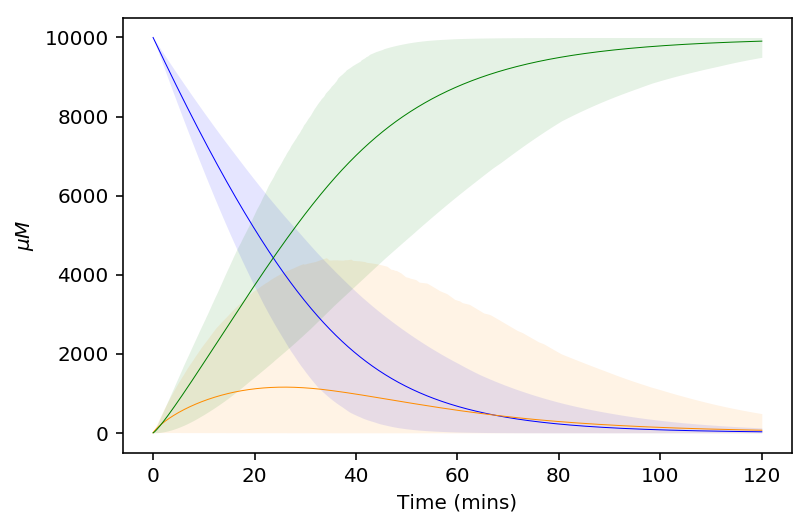

In [6]:
# Plot model runs at 95% CI
ci_dataframes = kinetics.dataframes_quartiles(model, outputs)
kinetics.plot_ci_intervals(['A', 'B', 'C'], ci_dataframes, colours=['blue', 'darkorange', 'green'])
plt.show()

A - blue
B - darkorange
C - green


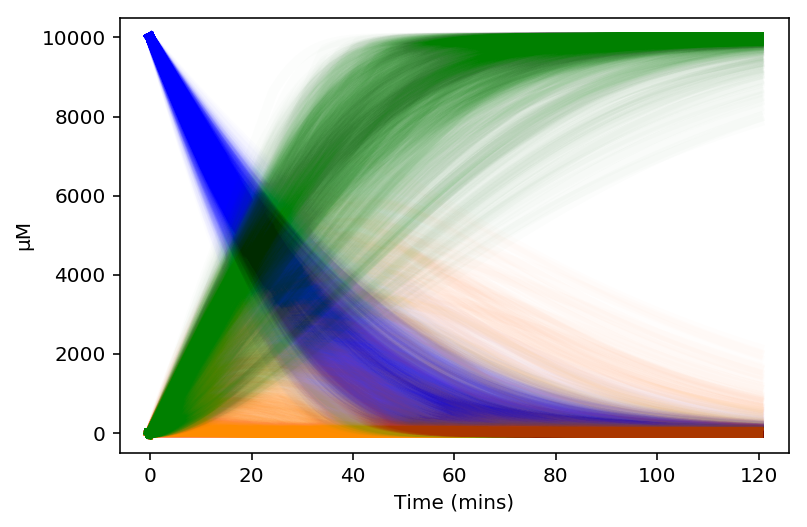

In [7]:
# Plot all model runs
all_runs_dataframes = kinetics.dataframes_all_runs(model, outputs)
kinetics.plot_substrate('A', all_runs_dataframes, colour='blue', alpha=0.01, linewidth=5)
kinetics.plot_substrate('B', all_runs_dataframes, colour='darkorange', alpha=0.01, linewidth=5)
kinetics.plot_substrate('C', all_runs_dataframes, colour='green', alpha=0.01, linewidth=5)
plt.show()